# Optics Clustering Algorithm 

,points,cluster,reachability distance,core distance
0,"[-4.112278646462144, -7.290679903998647]",0,1000,1000
1,"[-9.080334964234575, 4.741682419540384]",0,1000,1000
2,"[-4.500940746112175, -6.663959457731288]",0,1000,1000
3,"[-7.140724660308923, 4.384092953743103]",0,1000,1000
4,"[-7.867554052380145, 4.8083133879414115]",0,1000,1000


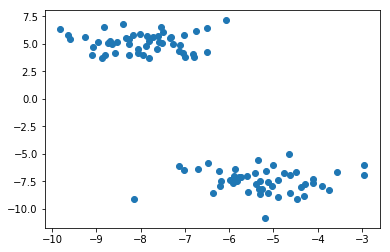

In [4]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import math 
x,y=make_blobs(n_samples=100,n_features=2,centers=2,random_state=19) #extracting the dataset
plt.scatter(x[:,0],x[:,1]) #visualising the initial dataset
data=pd.DataFrame({'points':x.tolist(),'cluster':0,'reachability distance':1000,'core distance':1000}) #creating the intial dataset
data.head()
  

# Function to Create Neighbourhood Of a Point in the Dataset

In [6]:
eps=5 #required parameter
m=3 #required parameter
def nbhd_x(n):
    '''
    creating a function to check the number of points in their neighbourhood along with their distance w.r.t the point
    using euclidean distance and checking with epsilon
    '''
    
    nbhd=[]
    idx=[]
    for i in range(len(x)):
            d=math.sqrt(sum([(a - b) ** 2 for a, b in zip(x[n], x[i])])) 
            if d!=0 and d<eps: 
                nbhd.append(d)
                idx.append(i) #extracting the neighbourhood point's index
    df=pd.DataFrame({"index":idx,"distance":nbhd}) #keeping the index and distance 
    return(df.sort_values("distance").reset_index(drop=True)) #sorting it 
nbhd_x(0).head()

,index,distance
0,82,0.374988
1,37,0.503834
2,64,0.624644
3,15,0.644598
4,2,0.737453


# Updating the Cluster,Reachability Distance,Core distance by creating a function

In [9]:
def iterate(n,df,cluster):
    if(df.shape[0]>m): #if cardinality of the neighbourhood is greater than m, its a core point
         data.iloc[n,3]=df.iloc[m-1,1] #updating the core distance
    data.iloc[n,1]=cluster #assisgning the initial cluster 
    for i,j in zip(df.iloc[ : ,1],df.iloc[:,0]): #i will range for neighbourhood distance and j for index in x
        rec=max(i,df.iloc[m-1,1]) #assigning the reachability distance
        if(rec<data.iloc[j,2]): 
            data.iloc[j,2]=rec
    for h in df.iloc[:,0]: #i will range for index in x and for loop is for checking wheather cluster is assigned or not
        if data.iloc[h,1]==0:
            nbhr=nbhd_x(h) #check for neighbourhood if it is unclustered
        if nbhr.shape[0]>m:
            data.iloc[h,1]=cluster
            data.iloc[h,3]=nbhr.iloc[m-1,1]
        for i,j in zip(nbhr.iloc[:,0],nbhr.iloc[:,1]): #checking for the neighbouhood points
            rec=max(j,nbhr.iloc[m-1,1])
            if rec<data.iloc[i,2]:
                    data.iloc[i,2]=rec
            else:
                pass
    else:
         pass    

cluster=1 #initialising the cluster
for i in data.index:
    if data.iloc[i,1]==0:
        df=nbhd_x(i)
        iterate(i,df,cluster) 
        cluster=cluster+1 

data.head() #calling the updated data

,points,cluster,reachability distance,core distance
0,"[-4.112278646462144, -7.290679903998647]",1,0.374988,0.624644
1,"[-9.080334964234575, 4.741682419540384]",2,0.450918,0.503413
2,"[-4.500940746112175, -6.663959457731288]",1,0.436554,0.680569
3,"[-7.140724660308923, 4.384092953743103]",2,0.368991,0.490799
4,"[-7.867554052380145, 4.8083133879414115]",2,0.423573,0.427238


In [ ]:
# Visualisation of the clusters through graph

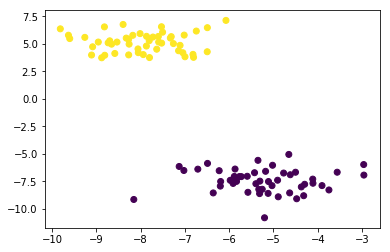

In [10]:
plt.scatter(x[:,0],x[:,1],c=data['cluster'])